# Rainfall Prediction - Weather Forecasting

# Problem Statement

                                      Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#checking the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
#checking for null values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

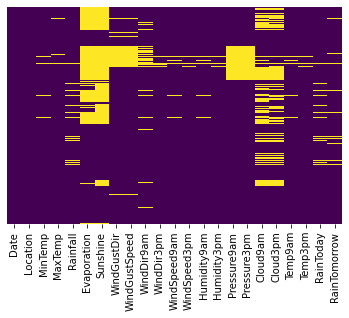

In [5]:
#using heatmap
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [6]:
#dropping columns
data.drop(['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date'],axis=1,inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
#checking first 5 data

data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [9]:
#checking for null values
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
#checking for the columns present
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

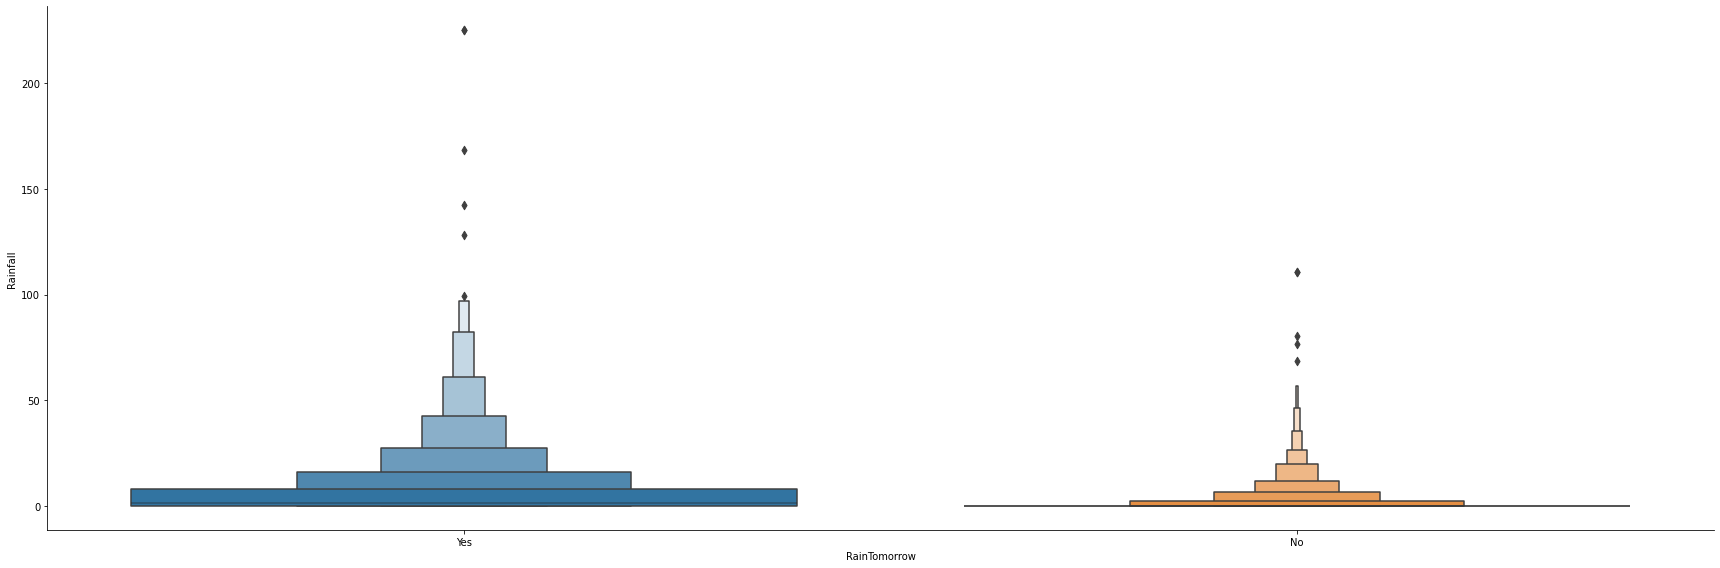

In [11]:
#using catplot in this case
sns.catplot(y="Rainfall",x="RainTomorrow",data=data.sort_values("Rainfall", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

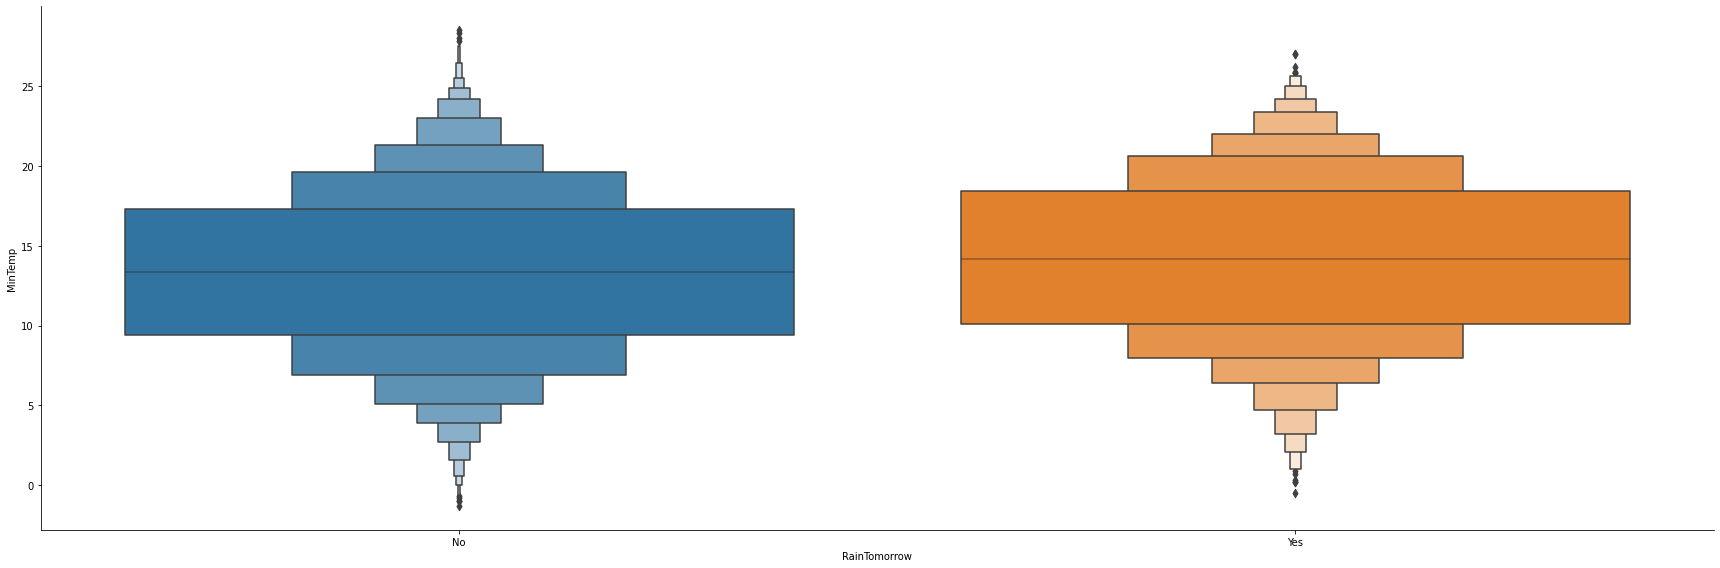

In [12]:
sns.catplot(y="MinTemp",x="RainTomorrow",data=data.sort_values("MinTemp", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

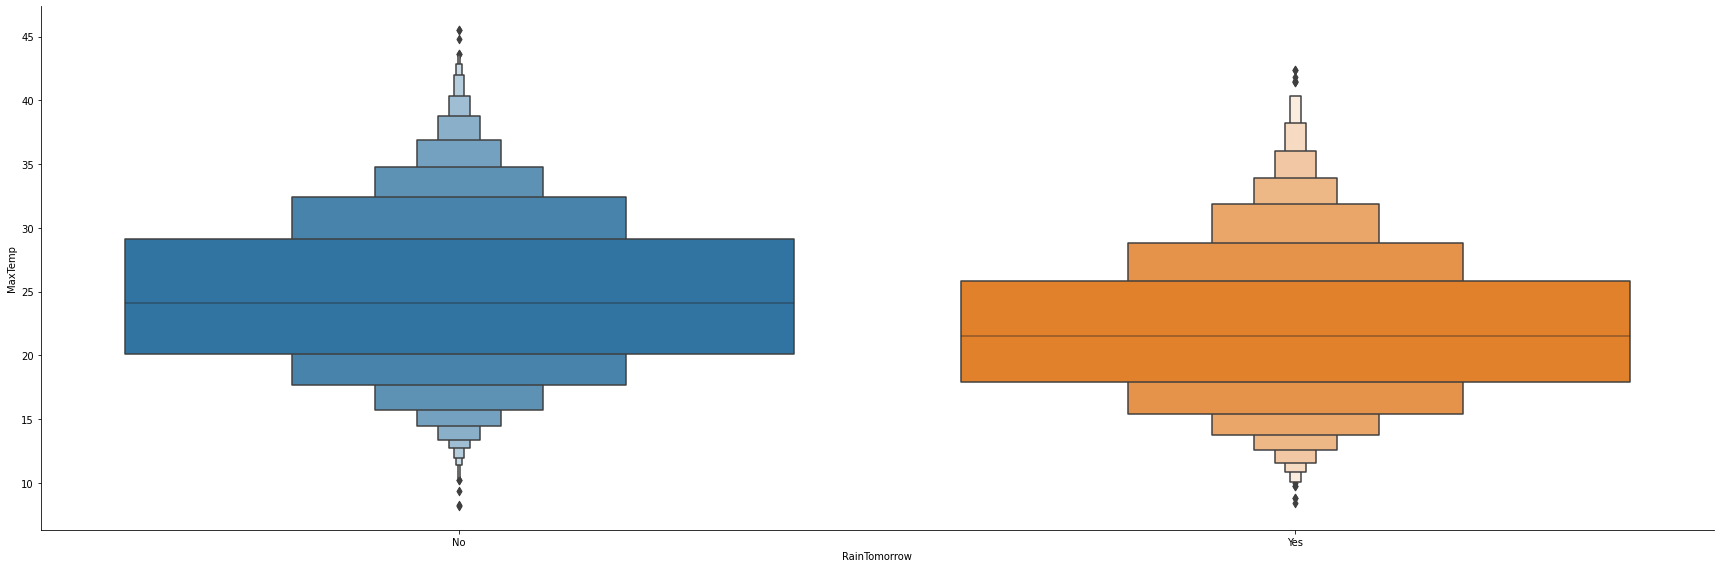

In [13]:
sns.catplot(y="MaxTemp",x="RainTomorrow",data=data.sort_values("MaxTemp", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

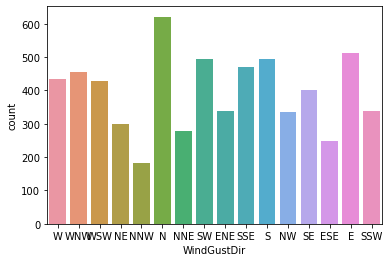

In [14]:
#using countplot for specific column data
sns.countplot(x='WindGustDir',data=data)

<AxesSubplot:xlabel='Location', ylabel='count'>

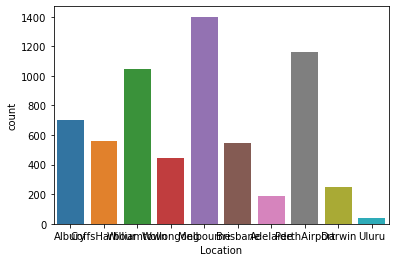

In [15]:
sns.countplot(x='Location',data=data)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

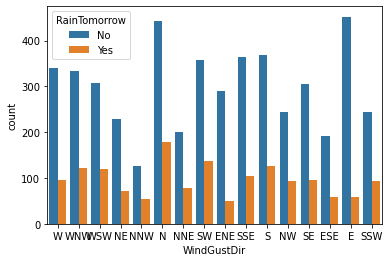

In [16]:

sns.countplot(x='WindGustDir',hue='RainTomorrow',data=data)

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

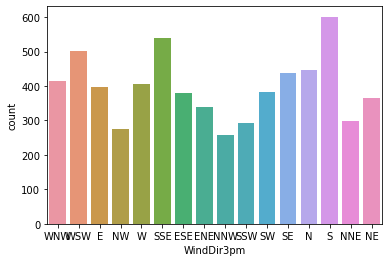

In [17]:
sns.countplot(x='WindDir3pm',data=data)

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

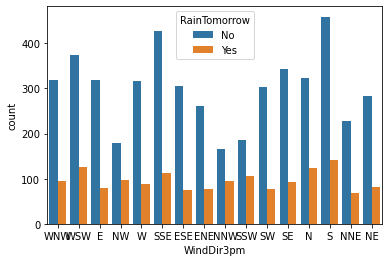

In [18]:
sns.countplot(x='WindDir3pm',hue='RainTomorrow',data=data)

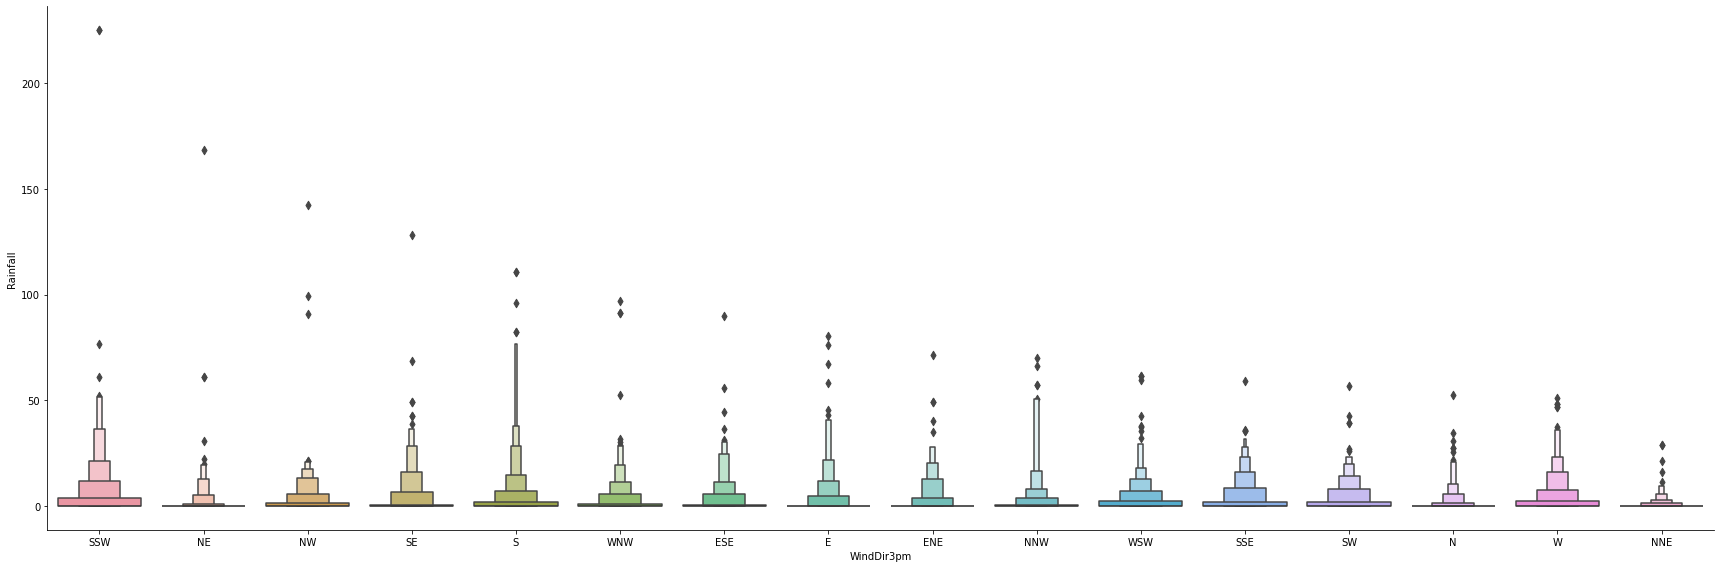

In [19]:
#using catplots
sns.catplot(y="Rainfall",x="WindDir3pm",data=data.sort_values("Rainfall", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

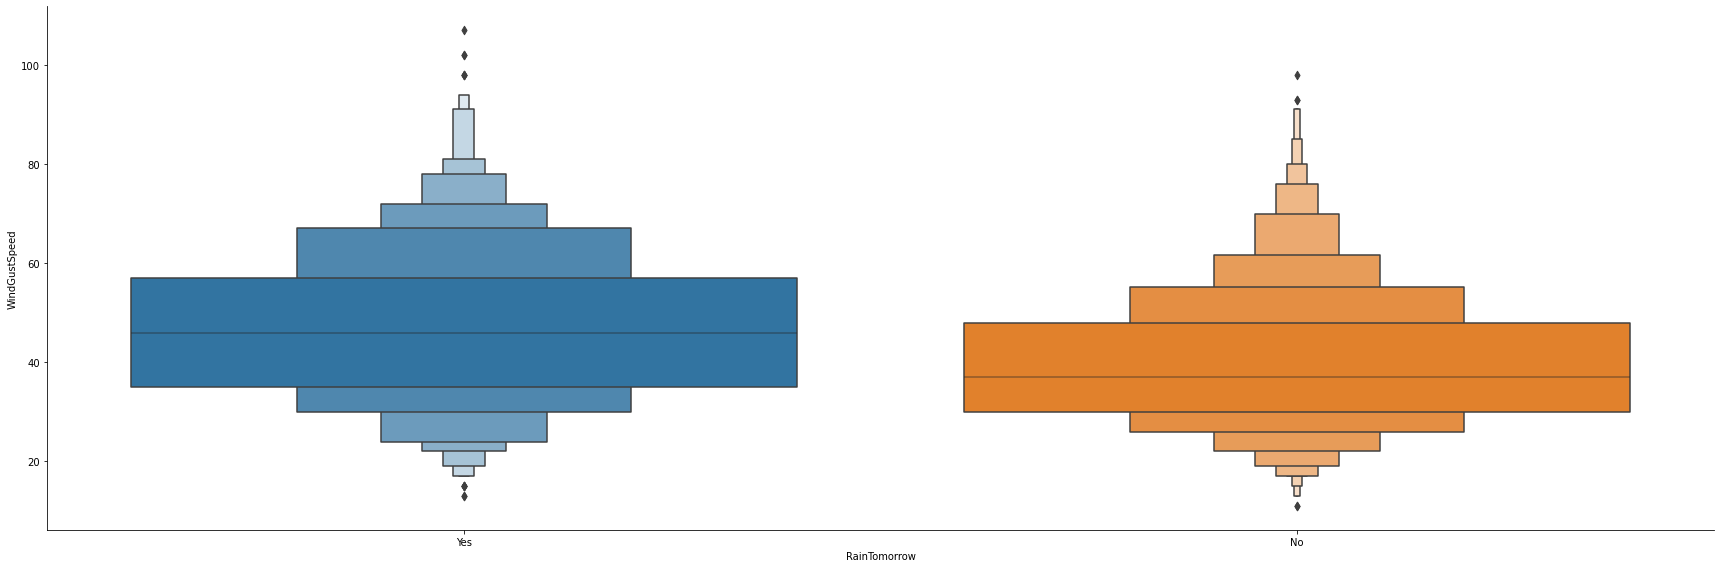

In [20]:
sns.catplot(y="WindGustSpeed",x="RainTomorrow",data=data.sort_values("WindGustSpeed", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

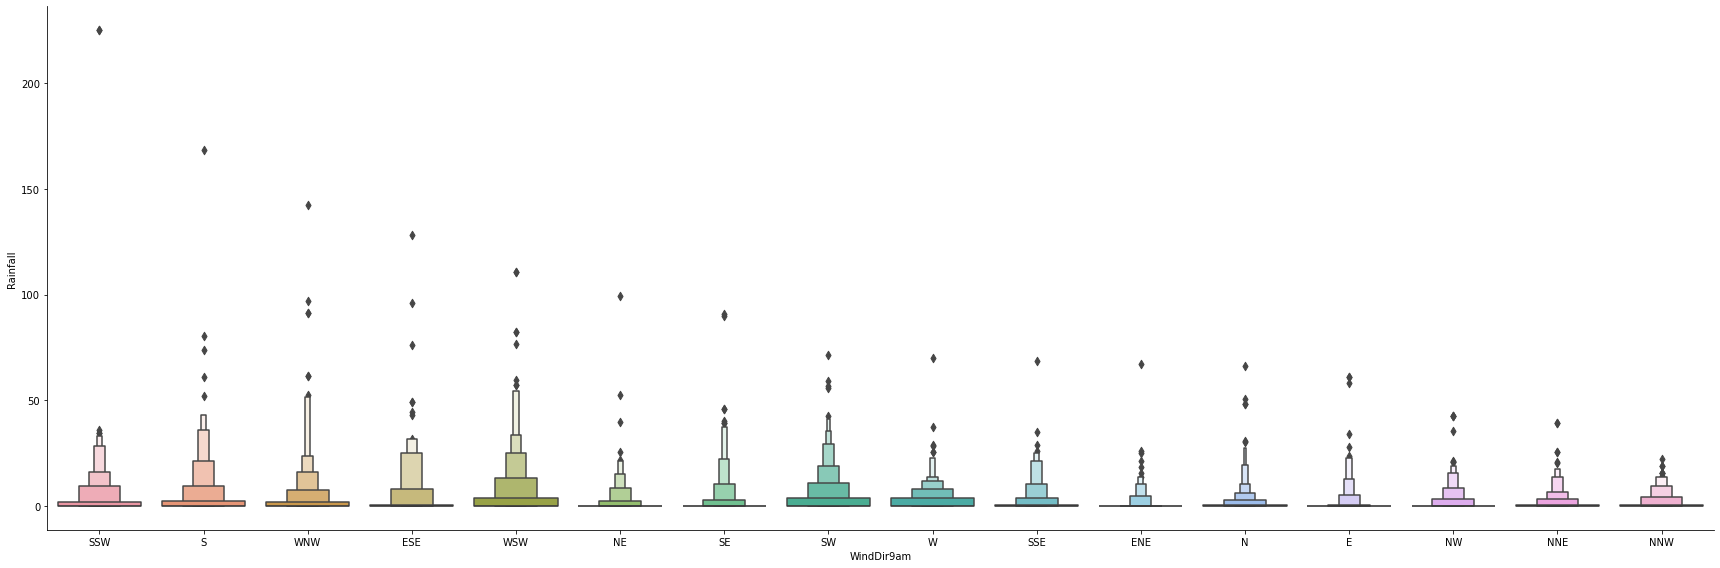

In [21]:
sns.catplot(y="Rainfall",x="WindDir9am",data=data.sort_values("Rainfall", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

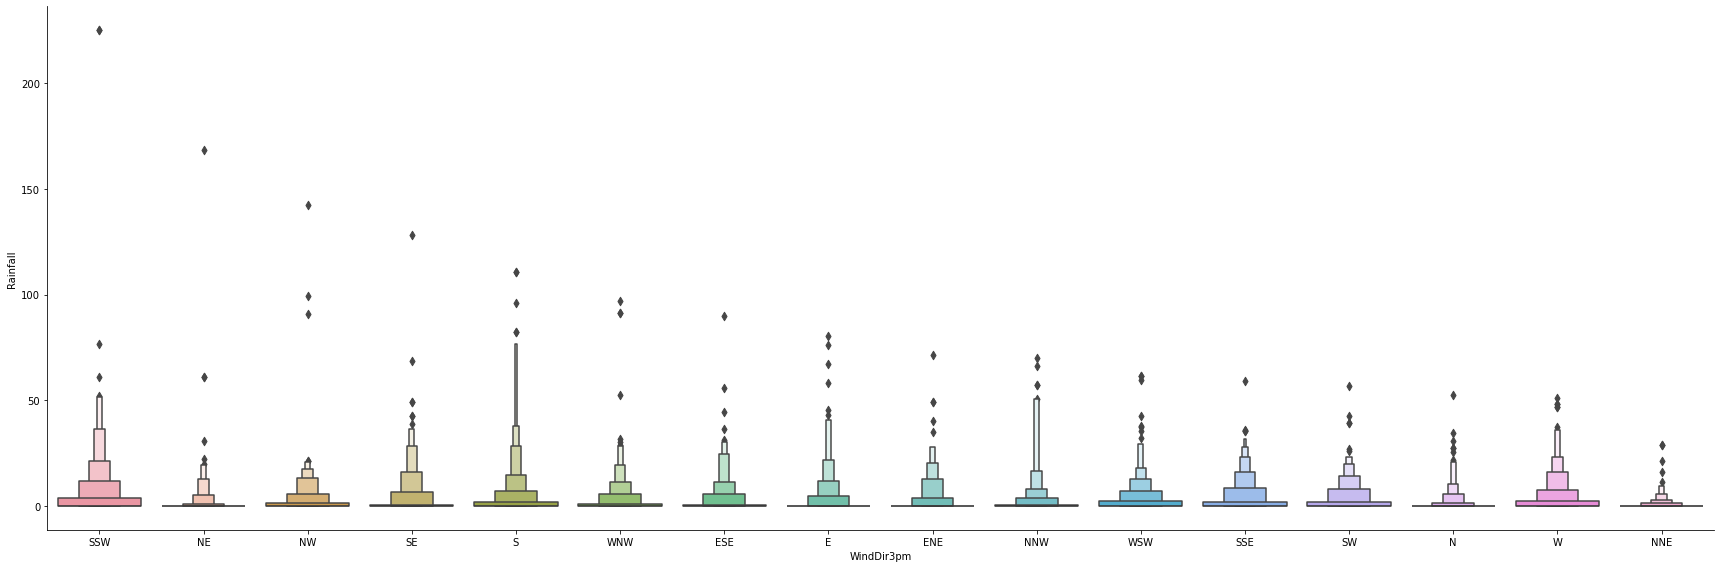

In [22]:
sns.catplot(y="Rainfall",x="WindDir3pm",data=data.sort_values("Rainfall", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

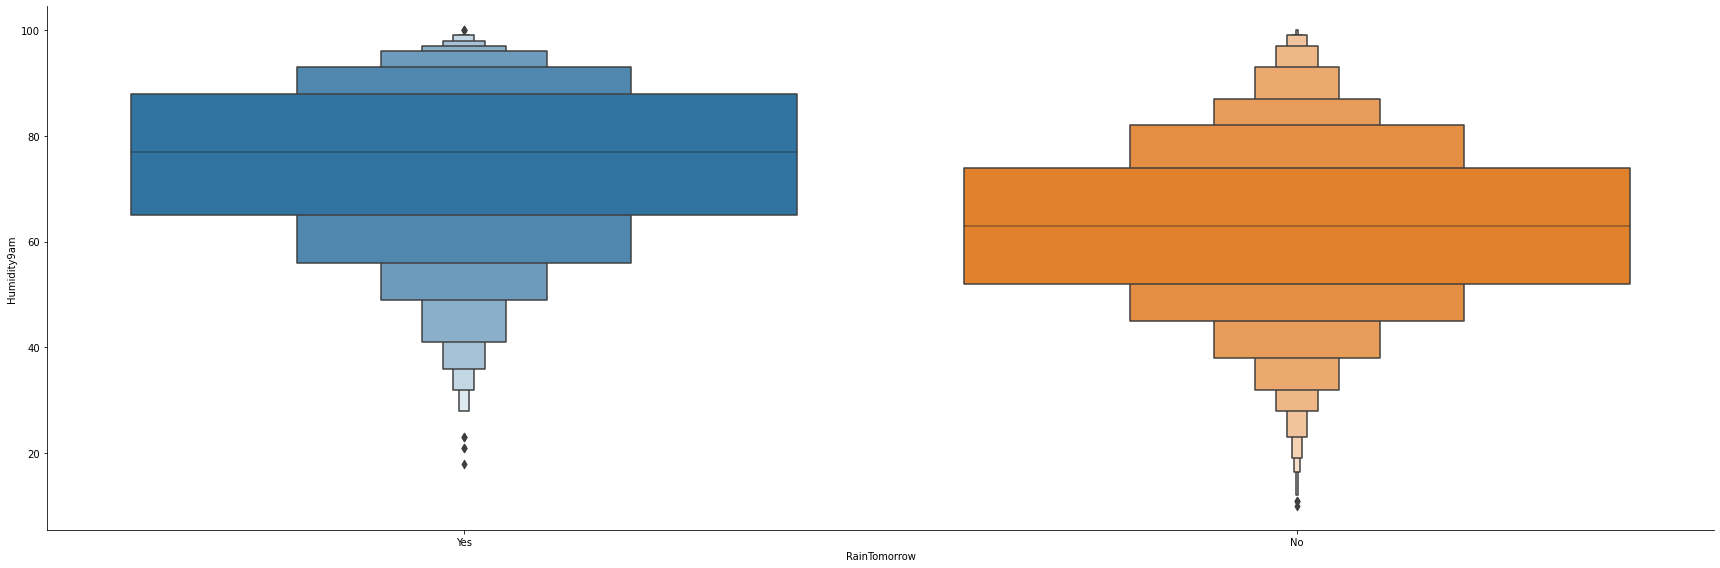

In [23]:
sns.catplot(y="Humidity9am",x="RainTomorrow",data=data.sort_values("Humidity9am", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

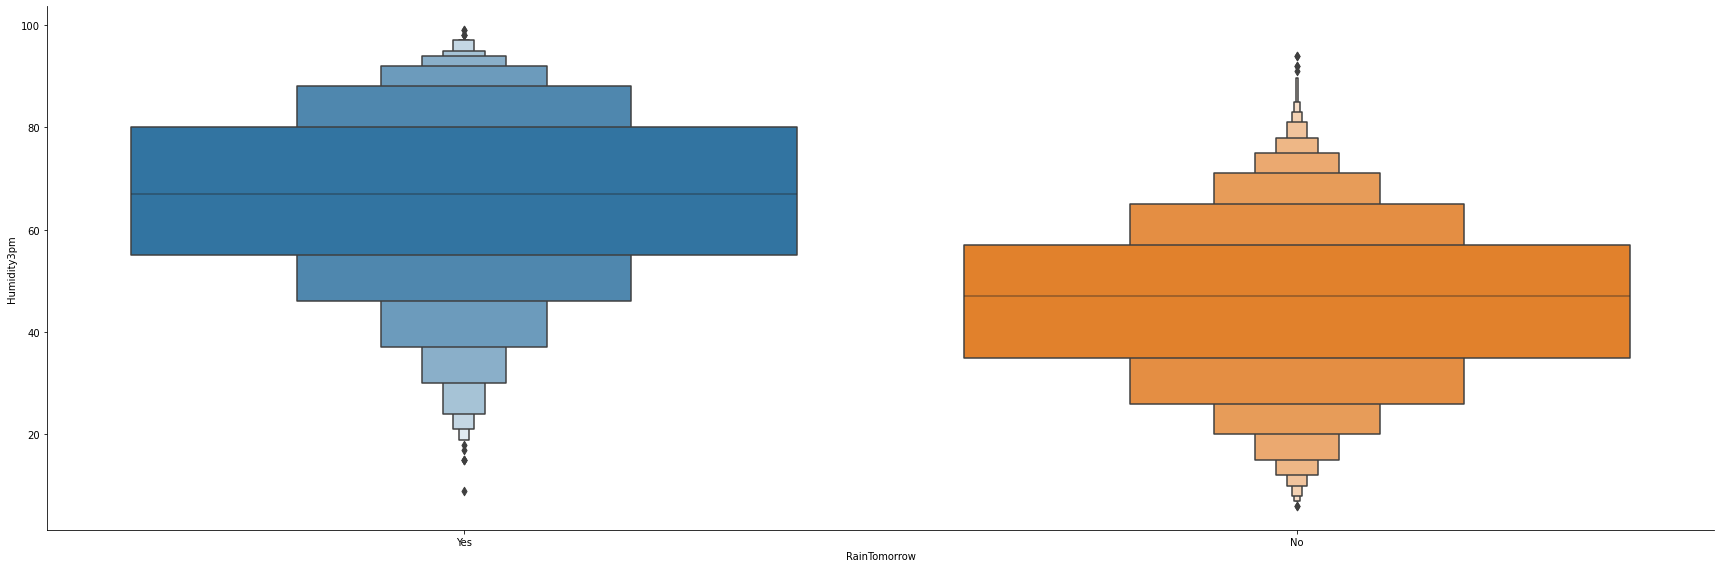

In [24]:
sns.catplot(y="Humidity3pm",x="RainTomorrow",data=data.sort_values("Humidity3pm", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

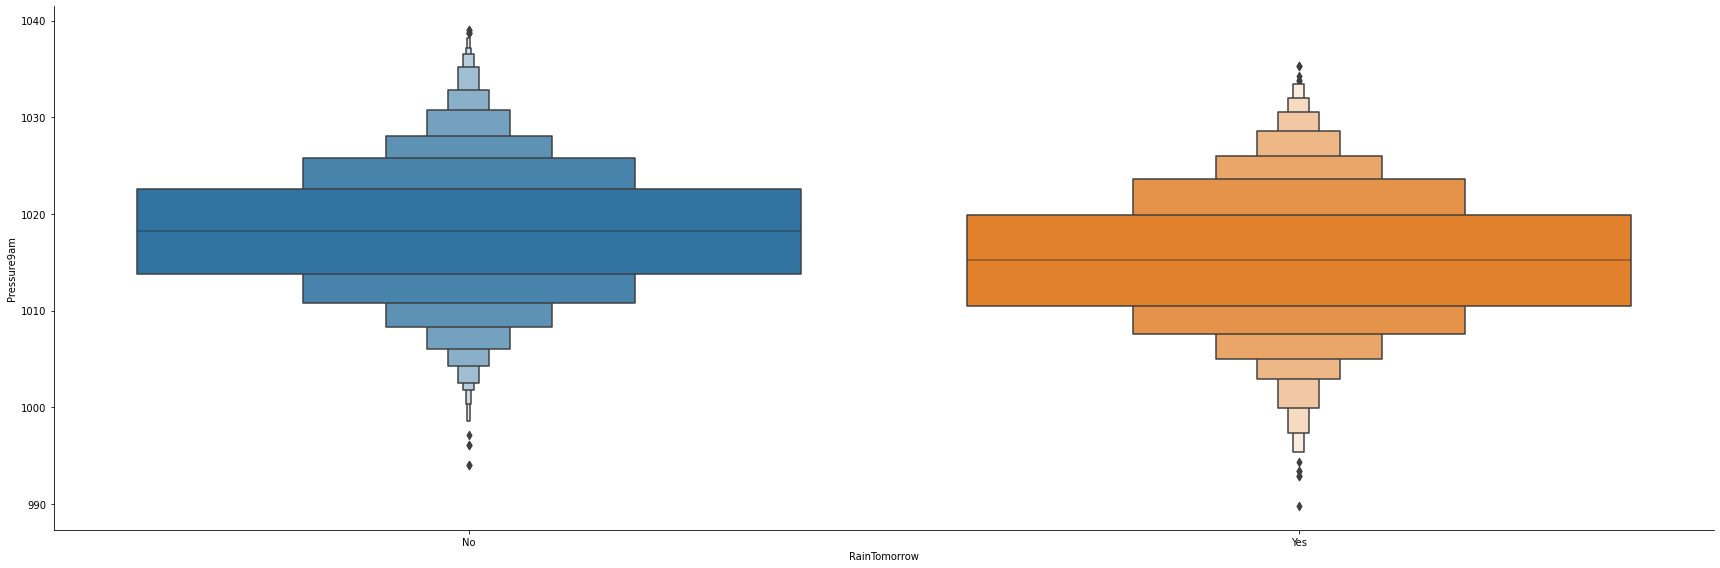

In [25]:
sns.catplot(y="Pressure9am",x="RainTomorrow",data=data.sort_values("Pressure9am", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

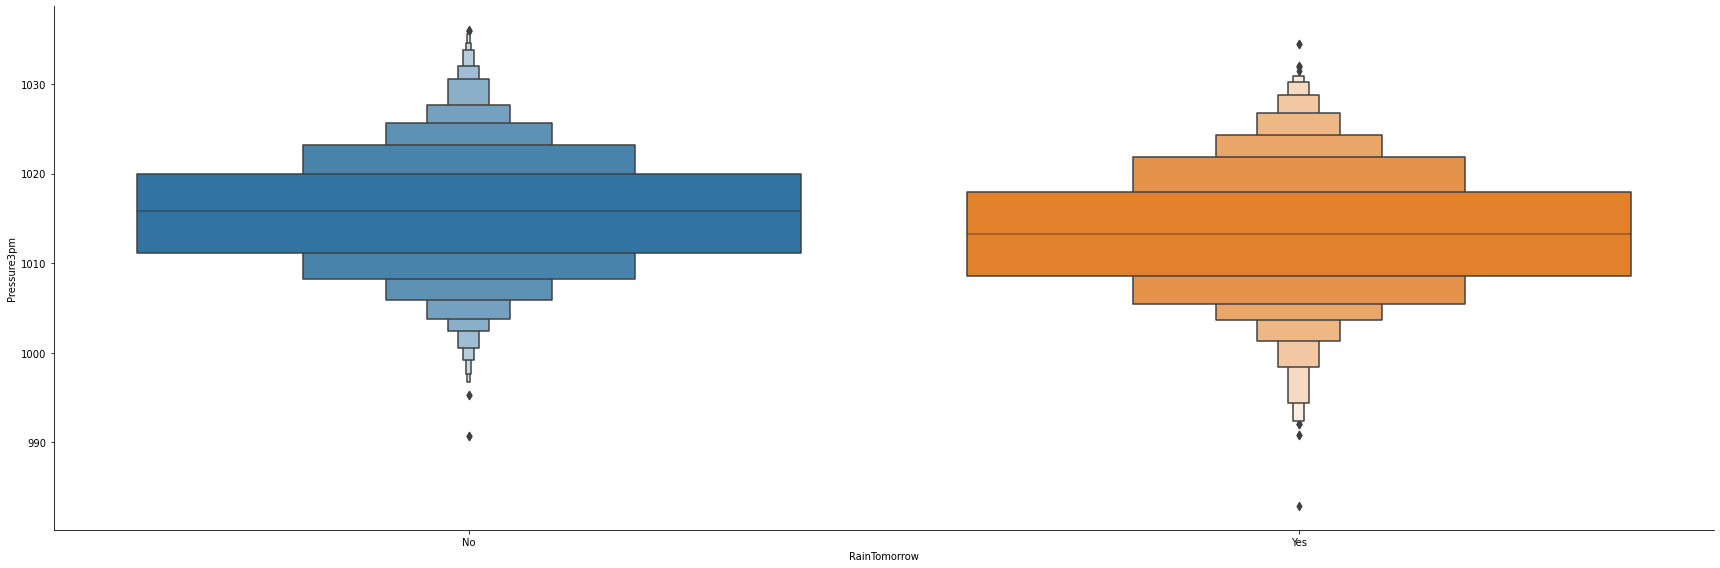

In [26]:
sns.catplot(y="Pressure3pm",x="RainTomorrow",data=data.sort_values("Pressure3pm", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

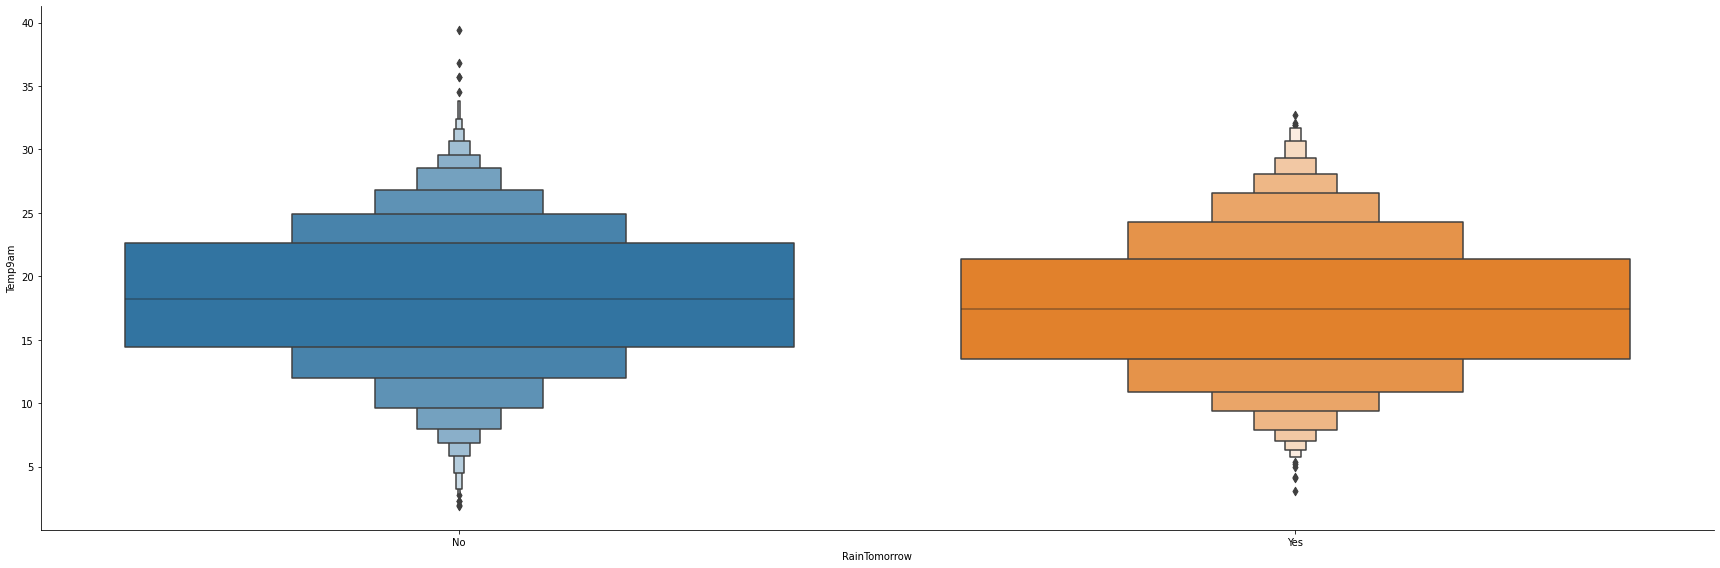

In [27]:
sns.catplot(y="Temp9am",x="RainTomorrow",data=data.sort_values("Temp9am", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [28]:
#checking for the counts 
data['Location'].value_counts()

Melbourne       1400
PerthAirport    1164
Williamtown     1044
Albury           700
CoffsHarbour     563
Brisbane         544
Wollongong       446
Darwin           250
Adelaide         185
Uluru             36
Name: Location, dtype: int64

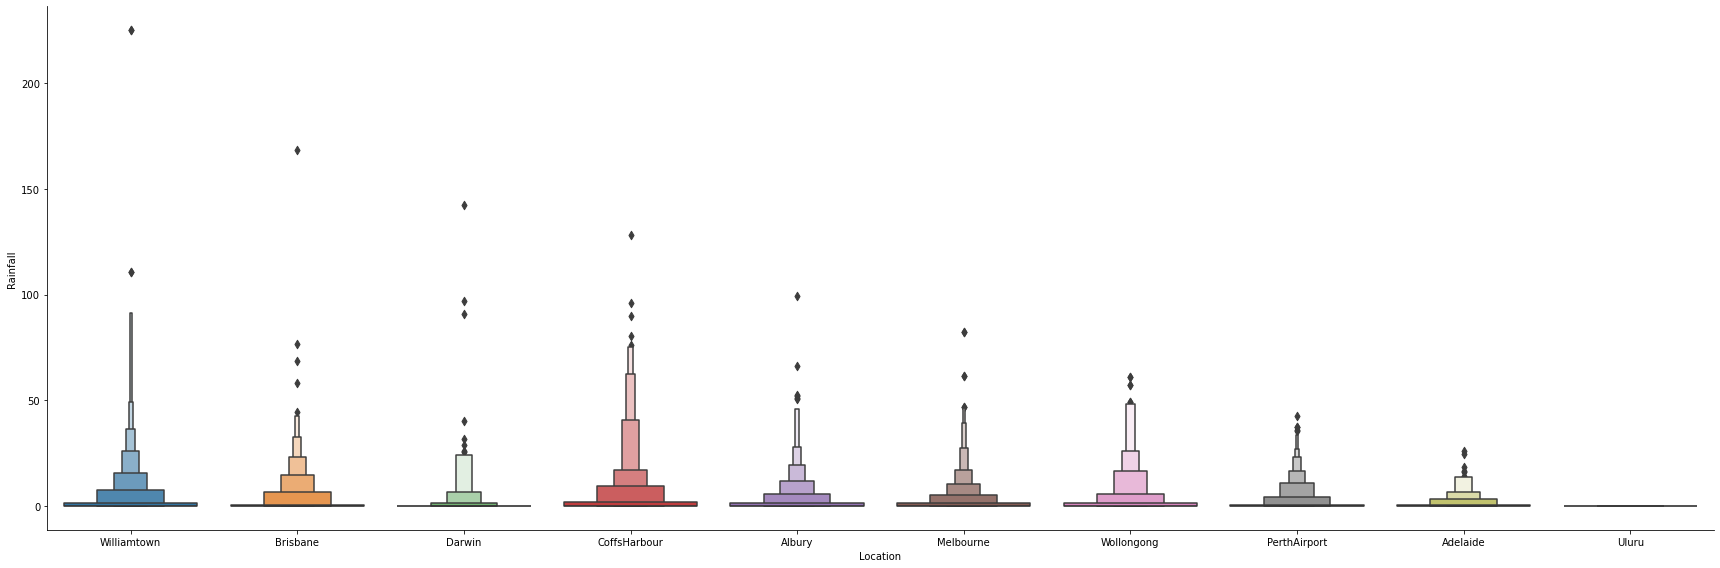

In [29]:
sns.catplot(y="Rainfall",x="Location",data=data.sort_values("Rainfall", ascending = False),kind='boxen',height = 8, aspect=3)
plt.show()

In [30]:
#encoding dataframe
from sklearn.preprocessing import OrdinalEncoder
data_1=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=data_1.fit_transform(data[i].values.reshape(-1,1))
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,1.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,1.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,1.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0


In [31]:
#checking for the statsatical values
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.00000,6332.000000
mean,4.908244,13.536592,24.057770,2.784397,7.751421,41.287903,7.700253,7.796747,15.897979,20.000316,66.111655,50.965414,1017.541693,1015.146920,18.174179,22.605212,0.24542,0.242577
std,2.545113,5.305000,6.221539,9.539455,4.755476,14.291072,4.717666,4.658067,9.464313,8.934660,16.727300,18.616937,6.783294,6.710036,5.575869,6.052499,0.43037,0.428675
min,0.000000,-1.300000,8.200000,0.000000,0.000000,11.000000,0.000000,0.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000,0.00000,0.000000
25%,3.000000,9.600000,19.500000,0.000000,3.000000,31.000000,3.000000,4.000000,9.000000,13.000000,55.000000,38.000000,1013.000000,1010.400000,14.100000,18.300000,0.00000,0.000000
50%,5.000000,13.600000,23.500000,0.000000,8.000000,39.000000,8.000000,8.000000,13.000000,19.000000,66.000000,51.000000,1017.500000,1015.300000,18.100000,22.100000,0.00000,0.000000
75%,6.000000,17.600000,28.200000,1.000000,12.000000,50.000000,12.000000,12.000000,20.000000,26.000000,78.000000,63.000000,1022.100000,1019.700000,22.300000,26.600000,0.00000,0.000000
max,9.000000,28.500000,45.500000,225.000000,15.000000,107.000000,15.000000,15.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,43.900000,1.00000,1.000000


<AxesSubplot:>

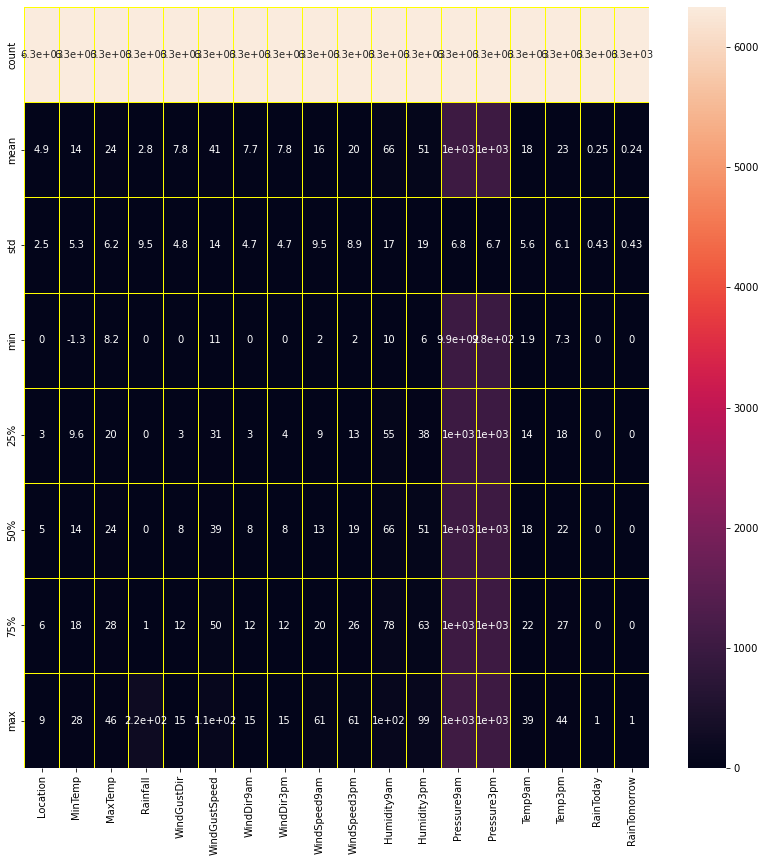

In [33]:
#using heatmap
plt.figure(figsize=(14,14))
sns.heatmap(data.describe(), annot=True, linewidth=.5,linecolor='yellow')

In [34]:
#checking the corelation of the dataset

data.corr()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.098892,0.008683,0.009523,-0.021226,0.253474,-0.039494,-0.031378,0.284156,0.303707,0.042971,0.102701,0.010301,0.028993,0.067779,0.004430,0.002536,0.000425
MinTemp,0.098892,1.000000,0.720152,0.081437,-0.184151,0.183754,-0.108725,-0.158214,0.079493,0.143644,-0.103033,0.069361,-0.446465,-0.441899,0.878485,0.689874,0.026659,0.068984
MaxTemp,0.008683,0.720152,1.000000,-0.109937,-0.265820,0.096041,-0.266690,-0.173319,-0.017879,0.042536,-0.406543,-0.436363,-0.328625,-0.415039,0.878400,0.978900,-0.261690,-0.186393
Rainfall,0.009523,0.081437,-0.109937,1.000000,0.059931,0.098853,0.108790,0.047049,0.056768,0.037545,0.279142,0.264113,-0.096913,-0.050601,-0.029746,-0.111771,0.501989,0.261826
WindGustDir,-0.021226,-0.184151,-0.265820,0.059931,1.000000,-0.011951,0.437480,0.563078,-0.070750,0.036809,0.098120,0.098749,-0.123531,-0.030203,-0.217435,-0.279599,0.156462,0.060887
WindGustSpeed,0.253474,0.183754,0.096041,0.098853,-0.011951,1.000000,-0.148029,0.064923,0.647507,0.699354,-0.243550,-0.093582,-0.408816,-0.373182,0.138739,0.057405,0.087769,0.213994
WindDir9am,-0.039494,-0.108725,-0.266690,0.108790,0.437480,-0.148029,1.000000,0.272433,-0.111515,-0.061450,0.132421,0.166902,0.014240,0.105566,-0.185197,-0.271712,0.178683,0.029477
WindDir3pm,-0.031378,-0.158214,-0.173319,0.047049,0.563078,0.064923,0.272433,1.000000,0.031338,0.077858,-0.013790,-0.033253,-0.148350,-0.051100,-0.172293,-0.186611,0.106279,0.006581
WindSpeed9am,0.284156,0.079493,-0.017879,0.056768,-0.070750,0.647507,-0.111515,0.031338,1.000000,0.529402,-0.296569,-0.115620,-0.158656,-0.119514,0.032900,-0.029441,0.044966,0.079605
WindSpeed3pm,0.303707,0.143644,0.042536,0.037545,0.036809,0.699354,-0.061450,0.077858,0.529402,1.000000,-0.165514,-0.042526,-0.271336,-0.221286,0.126931,0.019275,0.042454,0.078873


<AxesSubplot:>

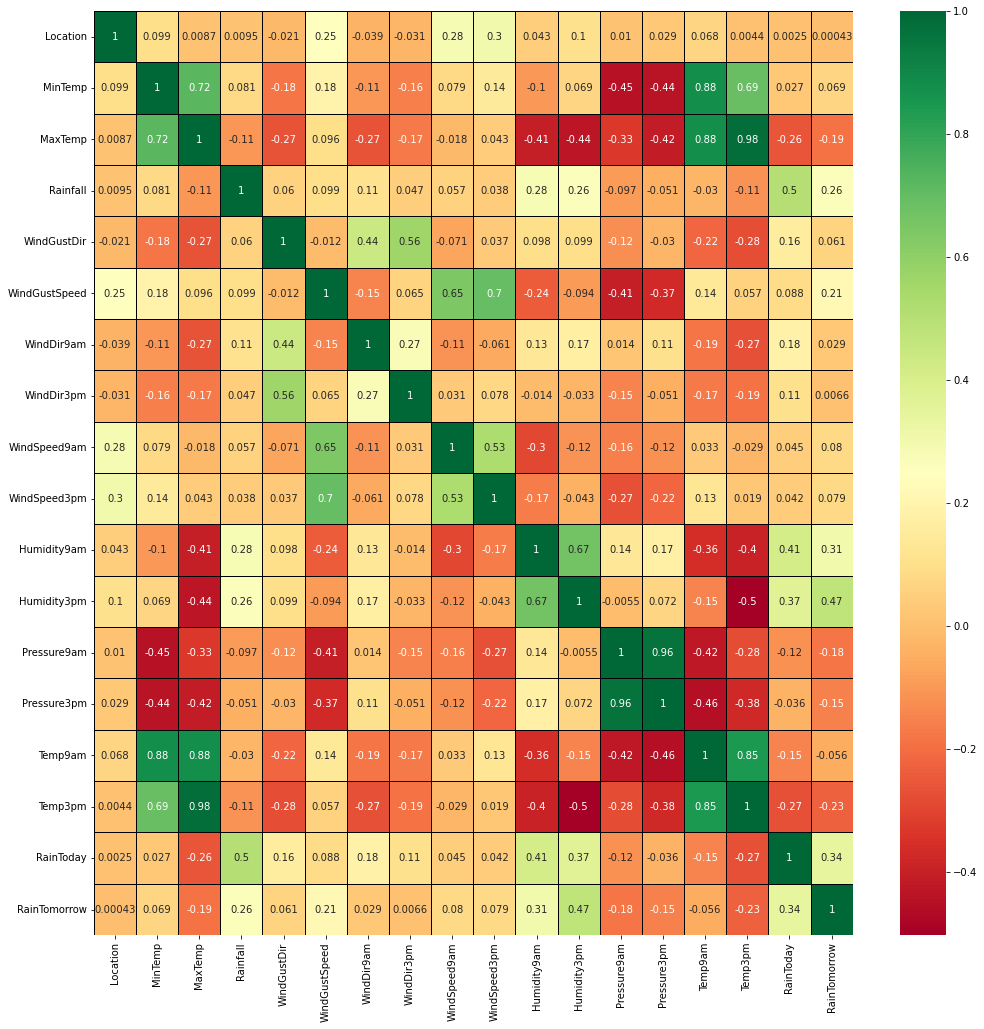

In [35]:
#using heatmap to display the data
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(), annot=True, linewidth=1,linecolor='black',cmap='RdYlGn')

In [36]:
#checking corelatioin for specific column 
data.corr()['Rainfall'].sort_values()

Temp3pm         -0.111771
MaxTemp         -0.109937
Pressure9am     -0.096913
Pressure3pm     -0.050601
Temp9am         -0.029746
Location         0.009523
WindSpeed3pm     0.037545
WindDir3pm       0.047049
WindSpeed9am     0.056768
WindGustDir      0.059931
MinTemp          0.081437
WindGustSpeed    0.098853
WindDir9am       0.108790
RainTomorrow     0.261826
Humidity3pm      0.264113
Humidity9am      0.279142
RainToday        0.501989
Rainfall         1.000000
Name: Rainfall, dtype: float64

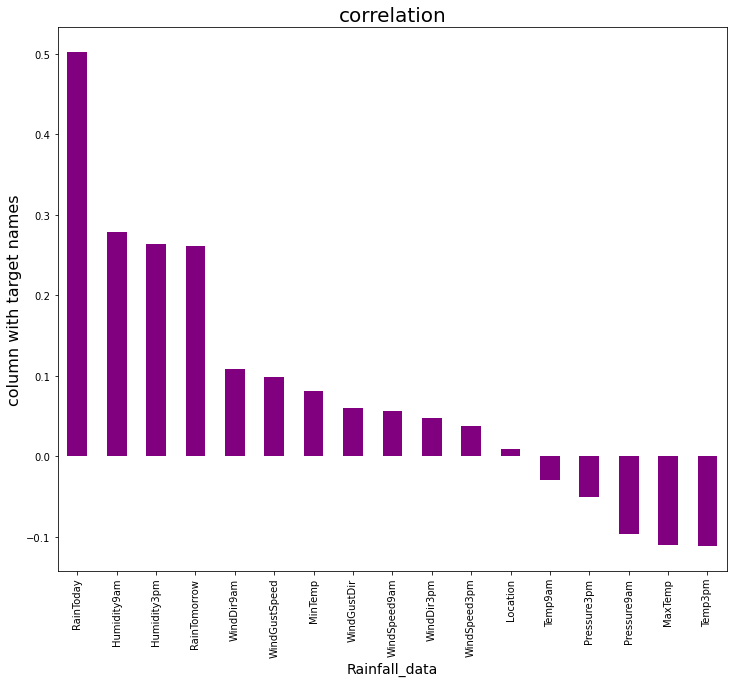

In [37]:
#checking correlation
plt.figure(figsize=(12,10))
data.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='purple')
plt.xlabel('Rainfall_data',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

In [38]:
data.corr()['RainTomorrow'].sort_values()

Temp3pm         -0.227838
MaxTemp         -0.186393
Pressure9am     -0.183962
Pressure3pm     -0.151541
Temp9am         -0.055935
Location         0.000425
WindDir3pm       0.006581
WindDir9am       0.029477
WindGustDir      0.060887
MinTemp          0.068984
WindSpeed3pm     0.078873
WindSpeed9am     0.079605
WindGustSpeed    0.213994
Rainfall         0.261826
Humidity9am      0.306375
RainToday        0.339071
Humidity3pm      0.473290
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

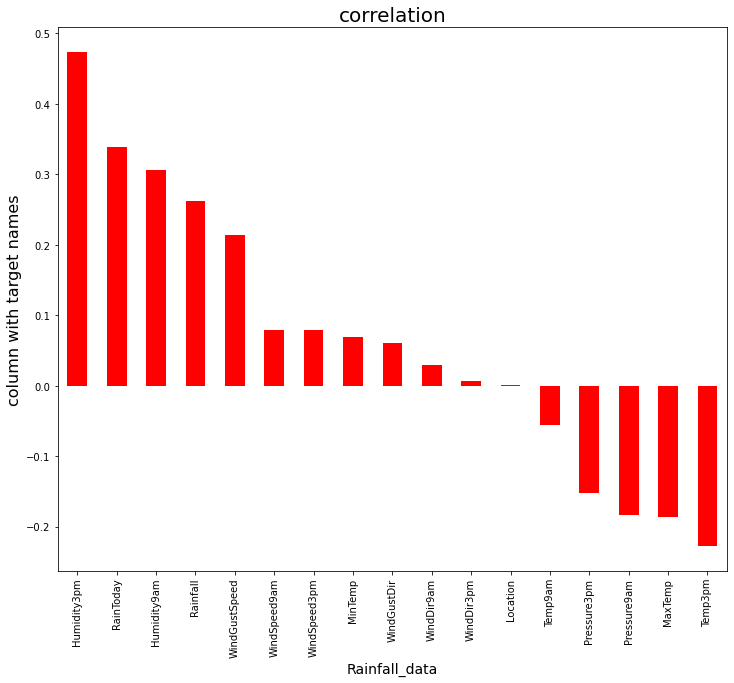

In [39]:
plt.figure(figsize=(12,10))
data.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='red')
plt.xlabel('Rainfall_data',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

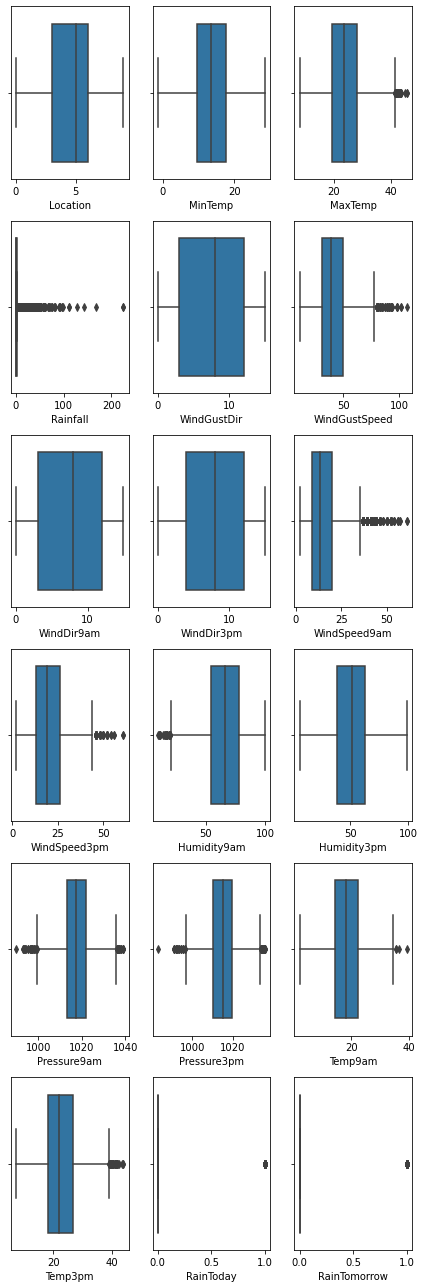

In [40]:
#checking outliers
import warnings
warnings.filterwarnings("ignore")
collist=data.columns.values
ncol=3
nrows=6
plt.figure(figsize=(nrows,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]])
    plt.tight_layout()

In [41]:
#checking for no of rows and colmns 
data.shape

(6332, 18)

In [42]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  12,   12,   41,   41,   49,   49,   57,   57,   58,   59,   59,
          62,   63,   63,  104,  200,  305,  305,  327,  328,  329,  351,
         368,  431,  522,  522,  523,  536,  550,  585,  605,  628,  629,
         634,  726,  739,  768,  769,  769,  769,  790,  791,  793,  913,
         957,  958,  992,  996, 1019, 1020, 1110, 1111, 1164, 1165, 1166,
        1225, 1226, 1227, 1258, 1279, 1288, 1319, 1326, 1328, 1335, 1423,
        1468, 1476, 1476, 1483, 1484, 1484, 1484, 1485, 1487, 1499, 1499,
        1499, 1506, 1506, 1516, 1516, 1636, 1647, 1658, 1658, 1702, 1713,
        1767, 1769, 1778, 1794, 1794, 1794, 1794, 1795, 1795, 1803, 1816,
        1836, 1858, 1899, 1911, 1942, 1943, 1947, 1954, 1958, 2024, 2033,
        2064, 2071, 2073, 2080, 2168, 2213, 2221, 2221, 2228, 2229, 2229,
        2229, 2230, 2232, 2244, 2244, 2244, 2251, 2251, 2261, 2261, 2381,
        2392, 2403, 2403, 2447, 2458, 2512, 2514, 2523, 2539, 2539, 2539,
        2539, 2540, 2540, 2548, 2561, 

In [43]:
np.abs(zscore(data))<0

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8420,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
E

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,1.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,1.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,1.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0


In [45]:
#checking for rows and columns 
data_new.shape

(6069, 18)

In [46]:
#to know the percentage loss
loss_data=((6332-6069)/6332)*100
loss_data

4.153506001263424

In [47]:
#checking values
data.skew().sort_values()

Humidity9am     -0.209426
Location        -0.171451
WindGustDir     -0.127982
WindDir3pm      -0.092115
WindDir9am      -0.027601
MinTemp         -0.027584
Pressure9am     -0.014362
Pressure3pm      0.004238
Temp9am          0.033470
Humidity3pm      0.089337
MaxTemp          0.355414
Temp3pm          0.369079
WindSpeed3pm     0.505636
WindGustSpeed    0.760239
WindSpeed9am     1.047535
RainToday        1.183448
RainTomorrow     1.201394
Rainfall         9.245988
dtype: float64

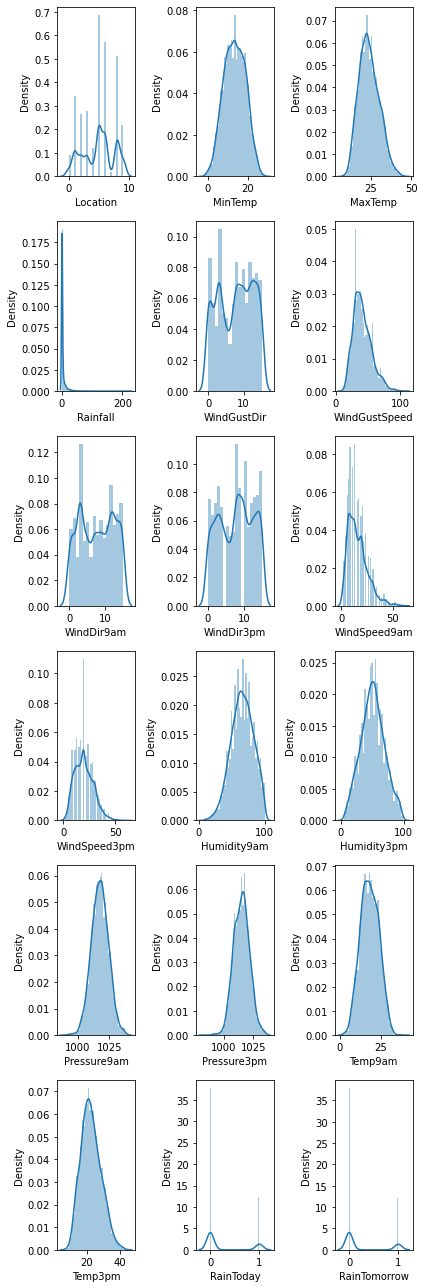

In [49]:
#distribution plot to check skewness
collist=data.columns.values
ncol=3
nrows=6
plt.figure(figsize=(nrows,3*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])
    plt.tight_layout()

In [50]:
from scipy import stats
def diagnostic_plots(data_1,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    data[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(data_1[variable],dist="norm",plot=plt)
    plt.show()

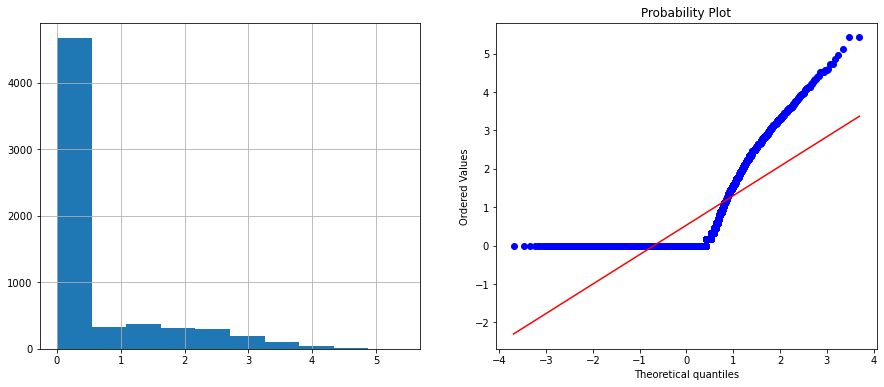

In [51]:
data['Rainfall']=np.log(data['Rainfall']+1)
diagnostic_plots(data,'Rainfall')

In [52]:
data['Rainfall'].skew()

1.869705180493499

In [53]:
x=data.drop('Rainfall',axis=1)
y=data['Rainfall']

In [54]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.54618911, -0.01364765, -0.11148256, ..., -0.05796419,
        -0.57029877, -0.56592127],
       [-1.54618911, -1.1570139 ,  0.2413042 , ...,  0.34897191,
        -0.57029877, -0.56592127],
       [-1.54618911, -0.10761024,  0.33432724, ...,  0.17297676,
        -0.57029877, -0.56592127],
       ...,
       [ 0.8223047 , -1.90650453,  0.27245632, ...,  0.38048446,
        -0.57029877, -0.56592127],
       [ 0.8223047 , -1.54808488,  0.51659603, ...,  0.62750936,
        -0.57029877, -0.56592127],
       [ 0.8223047 , -1.07952762,  0.53156617, ...,  0.61232572,
        -0.57029877, -0.56592127]])

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.54618911, -0.01364765, -0.11148256, ..., -0.05796419,
        -0.57029877, -0.56592127],
       [-1.54618911, -1.1570139 ,  0.2413042 , ...,  0.34897191,
        -0.57029877, -0.56592127],
       [-1.54618911, -0.10761024,  0.33432724, ...,  0.17297676,
        -0.57029877, -0.56592127],
       ...,
       [ 0.8223047 , -1.90650453,  0.27245632, ...,  0.38048446,
        -0.57029877, -0.56592127],
       [ 0.8223047 , -1.54808488,  0.51659603, ...,  0.62750936,
        -0.57029877, -0.56592127],
       [ 0.8223047 , -1.07952762,  0.53156617, ...,  0.61232572,
        -0.57029877, -0.56592127]])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=670)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.9833859880430798

In [57]:
rfr.score(x_test,y_test)

0.8629827857180681

Text(0, 0.5, 'y_pred')

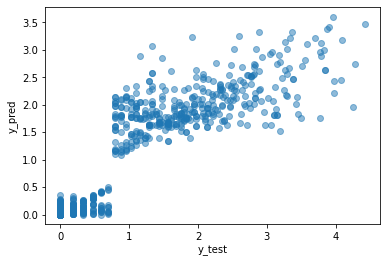

In [58]:
#using scatterplot in this case
0.905637215483221
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [59]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.16933611715583483
MSE: 0.11896399876670236
RMSE: 0.3449115810852143


In [60]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=4,cv=9,verbose= 2,random_state=65,n_jobs=1)

In [61]:
rf_random.fit(x_train,y_train)

Fitting 9 folds for each of 4 candidates, totalling 36 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   3.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;

RandomizedSearchCV(cv=9, estimator=RandomForestRegressor(), n_iter=4, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=65, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

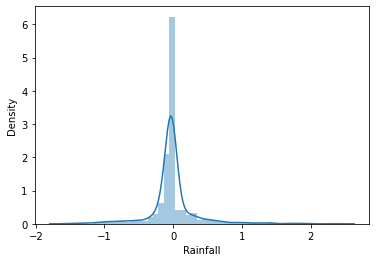

In [63]:
#using distplot
predictions=rf_random.predict(x_test)
sns.distplot(y_test-predictions)

In [64]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.17463594269659408
MSE: 0.11674969600954715
RMSE: 0.34168654642749274


In [65]:
#save the model
import pickle
file=open('Rainfall_Weather_Forecasting.pkl','wb')
pickle.dump(rf_random,file)

In [66]:
models=open('Rainfall_Weather_Forecasting.pkl','rb')
forest=pickle.load(models)

In [67]:
y_prediction=forest.predict(x_test)
metrics.r2_score(y_test,y_prediction)*100

86.55331168981522

In [68]:
x=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
maxAccu=0
minRs=0
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predict=lr.predict(x_test)
    acc=accuracy_score(y_test,predict)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
    print("Best Accuracy is:-",maxAccu,"on random state",maxRs)

Best Accuracy is:- 0.828421052631579 on random state 0
Best Accuracy is:- 0.8321052631578948 on random state 1
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8457894736842105 on random state 2
Best Accuracy is:- 0.8478947368421053 on random state 8
Best Accuracy is:- 0.8478947368421053 on random state 8


In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn_classifier.fit(x_train,y_train)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.8389473684210527

In [75]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier()
xgb_classifier.fit(x_train,y_train)
y_pred_xgb=xgb_classifier.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.9110526315789473

In [76]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [77]:
#train with standard scaled data
xgb2=XGBClassifier()
xgb2.fit(x_train_sc,y_train)
y_pred_xgb_sc=xgb2.predict(x_test_sc)
accuracy_score(y_test,y_pred_xgb_sc)

0.9110526315789473

In [78]:
params={"learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
       "max_depth":[3,4,5,6,8,10,12,15],
       "min_child_weight":[1,3,5,7],
       "gamma":[0.1,0.2,0.3,0.4],
       "colsample_bytree":[0.3,0.4,0.5,0.7]}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_classifier,param_distributions=params,scoring='roc_auc',n_iter=5,n_jobs=-1,verbose=3)
random_search.fit(x_train,y_train)
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [79]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [80]:
from numpy import nan


#training XGBoost Classifier with best parameter
xgb=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [81]:
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.8836842105263157

In [82]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb,x,y,cv=7)
print("Cv score of XGBoost Classifier is:-",score.mean()*100)

Cv score of XGBoost Classifier is:- 85.05807740394353


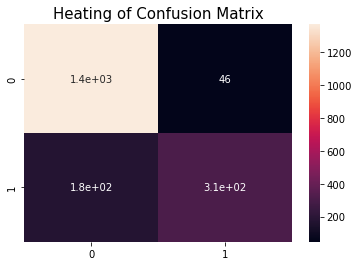

In [83]:
cm=confusion_matrix(y_test,y_pred_xgb)
plt.title('Heating of Confusion Matrix', fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

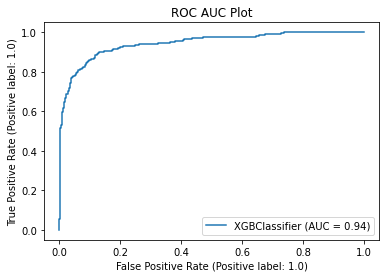

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_search.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [86]:
import joblib
joblib.dump(random_search.best_estimator_,"Rainfall_Weather_Forecasting_tommorow")

['Rainfall_Weather_Forecasting_tommorow']